In [94]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from numba import njit

plt.style.use(['science', 'grid', 'notebook'])

# Ejercicio 1

Estimar la capacidad del modelo de Hopfield sin ruido.
- Crear los patrones $x_i^\mu$ (i = 1,...N; µ = 1,...,p). Cada uno de los valores es ±1 con igual probabilidad.
- Evaluar la matriz de conexiones: $\omega_{ij} = \frac{1}{N} \sum_{\mu=1}^{p}x_i^\mu x_j^\mu$ (tomar $\omega_{ii}=0$)
- Tomar uno de los patrones como condicion inicial e iterar la dinámica determinista hasta converger a un punto fijo ($s_i^\mu$). Comparar la dinámica secuencial con la paralela desde el punto de vista de la convergencia.

Para la dinámica secuencial:
- Calcular el overlap $m^\mu = \frac{1}{N}\sum_{i=1}^N s_i^\mu s_j^\mu$.
- Repetir para todos los patrones y calcular la distribuciónn de los overlaps.
- Realizar todos los puntos anteriores para N = 500,1000,2000,4000 y α= p/N = 0.12,0.14,0.16,0.18

In [139]:
def generate_patron(p, N):
    """
    Genera una matriz de datos aleatorios con valores -1 y 1 de manera uniforme.
    
    Parámetros:
    N (int): Número de filas.
    p (int): Número de columnas.
    
    Retorna:
    np.ndarray: Matriz de tamaño (N, p) con valores -1 y 1.
    """
    return np.random.choice([-1, 1], size=(p, N))

def calculate_conections(data):
    """
    Calcula la matriz de conexiones para una matriz de datos.
    
    Parámetros:
    data (np.ndarray): Matriz de datos.
    
    Retorna:
    np.ndarray: Matriz de conexiones.
    """
    # p = data.shape[0]
    N = data.shape[1]
    W = np.dot(data.T, data)/N
    np.fill_diagonal(W, 0)
    return W

def actualize_parallel(W, s):
    return np.sign(np.dot(W, s))

def actualize_secuential(W, s):
    index = np.arange(s.size)
    np.random.shuffle(index)
    s_new = s.copy()
    for i in index:
        s_new[i] = np.sign(np.dot(W[i], s_new))
    return s_new

def overlap(s1, s2):
    return np.dot(s1, s2)/s1.size

def get_steady_point(W, s, max_iter=1000, func=actualize_secuential):
    s_new = func(W, s)
    cont = 0
    while not np.array_equal(s, s_new):
        cont += 1
        s = s_new
        s_new = func(W, s)
        if cont > max_iter:
            break
    return s_new

def calculate_overlaps(W, data):
    overlap_matrix = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        overlap_matrix[i] = overlap(data[i], get_steady_point(W, data[i]))
    return overlap_matrix

In [ ]:
# defino los N y alphas a utilizar
N = np.array([500, 1000, 2000, 4000])
alpha = np.array([0.12, 0.14, 0.16, 0.18])

In [142]:
# itero sobre todo los alphas y N
overlap_matrix = np.zeros((len(N), len(alpha)), dtype=np.ndarray)

for i in range(len(N)):
    for j in range(len(alpha)):
        p = int(N[i]*alpha[j])
        data = generate_patron(p, N[i])
        W = calculate_conections(data)
        overlap_matrix[i, j] = calculate_overlaps(W, data)

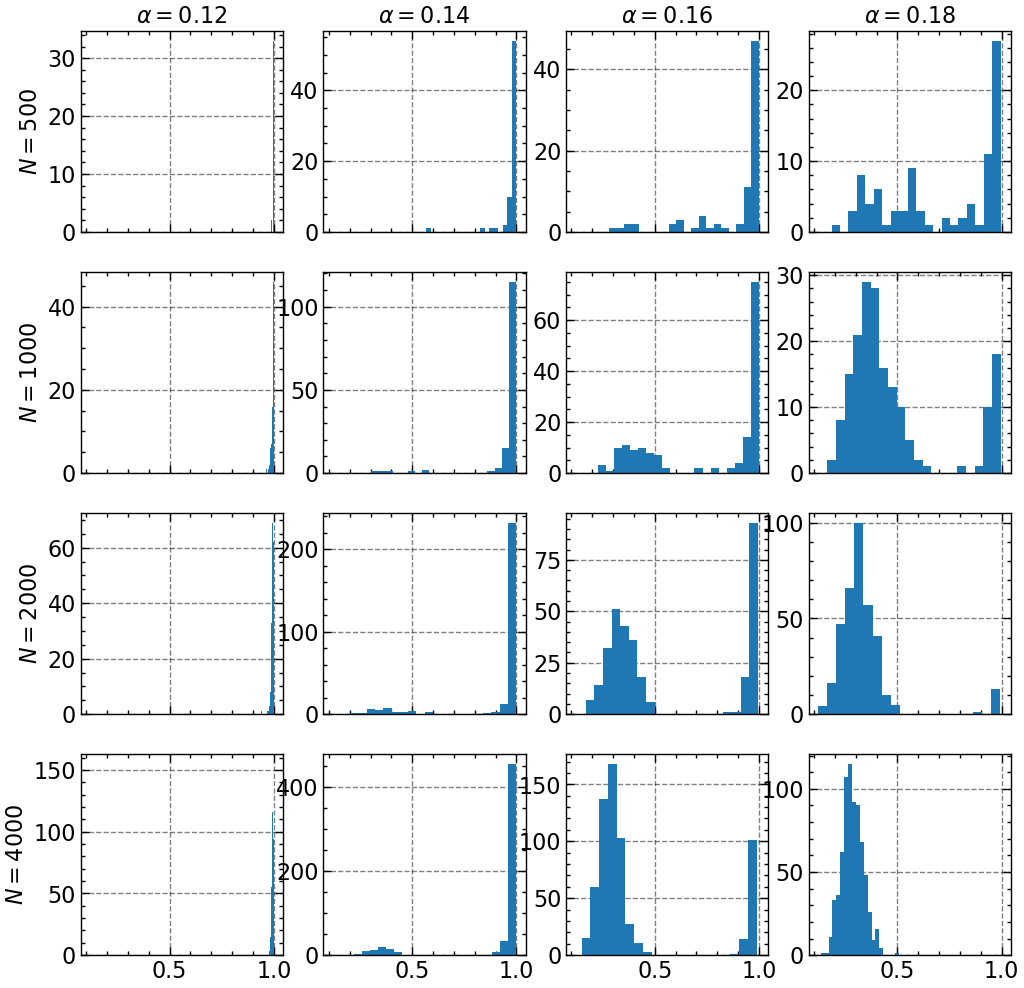

In [143]:
# imprimo los histogramas
fig, axs = plt.subplots(N.size, alpha.size, figsize=(12, 12), sharex=True)

for i in range(N.size):
    for j in range(alpha.size):
        axs[i, j].hist(overlap_matrix[i, j], bins=20, color='tab:blue')

        if i == 0:
            axs[i, j].set_title(f'$\\alpha = {alpha[j]}$')
        if j == 0:
            axs[i, j].set_ylabel(f'$N = {N[i]}$')

    